In [197]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [198]:
df_main=pd.read_csv('breast-cancer-data.csv',index_col=0)
df=df_main
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [199]:
res_col=df_main['diagnosis']

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [201]:
df.drop(["diagnosis"], inplace=True, axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [202]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [203]:
scaled_df=ss.fit_transform(df)

In [204]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)

In [205]:
pca_df=pca.fit_transform(scaled_df)

In [206]:
pca.explained_variance_ratio_.sum()

0.9100953006965852

In [207]:
df_final=pd.DataFrame(pca_df)
df_final.columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7']
df_final

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411423,2.159372
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028658,0.013357
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668164
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429912
4,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226495,-0.936214
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375194,-0.596128
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246711,-0.716324
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082


<AxesSubplot:>

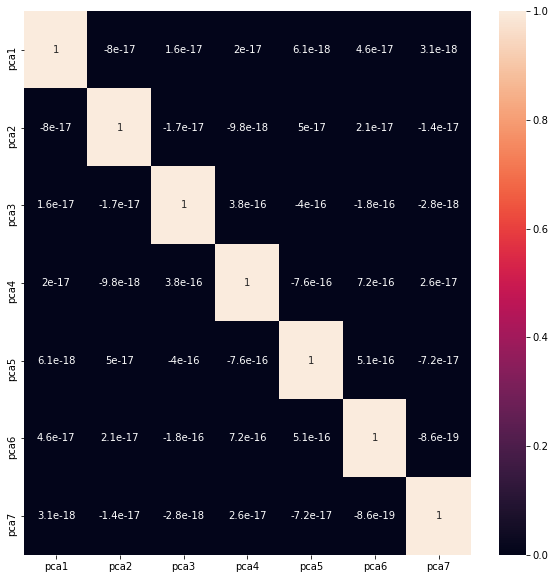

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot=True)

In [209]:
df_final.index=df_main.index
df_final

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
id,,,,,,,
842302,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411423,2.159372
842517,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028658,0.013357
84300903,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668164
84348301,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429912
84358402,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226495,-0.936214
...,...,...,...,...,...,...,...
926424,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375194,-0.596128
926682,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246711,-0.716324
926954,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759


In [210]:
df_final['diagnosis']=res_col
df_final

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,diagnosis
id,,,,,,,,
842302,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411423,2.159372,M
842517,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028658,0.013357,M
84300903,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668164,M
84348301,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429912,M
84358402,3.935302,-1.948072,1.389767,2.940639,0.546748,-1.226495,-0.936214,M
...,...,...,...,...,...,...,...,...
926424,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375194,-0.596128,M
926682,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246711,-0.716324,M
926954,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759,M


without scaling attributes can be reduced still

In [211]:
from sklearn.decomposition import PCA
pca_unscale=PCA(n_components=2)

In [215]:
pca_df=pca_unscale.fit_transform(df)

In [216]:
pca_unscale.explained_variance_ratio_.sum()

0.998221161374172

END